## Observations and Insights 

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [100]:
# Checking the number of mice.
merged_data_df["Mouse ID"].value_counts()

g989    13
g570    10
c139    10
a644    10
s565    10
        ..
u153     1
d133     1
v199     1
t573     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [101]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data_df[["Mouse ID", "Timepoint"]].value_counts()

Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
                      ..
q610      30           1
          35           1
q633      0            1
          5            1
a203      0            1
Length: 1888, dtype: int64

In [102]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data_mice= merged_data_df.set_index("Mouse ID")
mouse = merged_data_mice.loc["g989", :]
mouse.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [103]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_mice = merged_data_mice.drop(index = 'g989')
clean_merged_df = clean_merged_mice.reset_index()
clean_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [104]:
# Checking the number of mice in the clean DataFrame.
clean_merged_df["Mouse ID"].value_counts()

g570    10
c139    10
a644    10
s565    10
y163    10
        ..
o848     1
l872     1
v199     1
u153     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_group = clean_merged_df.groupby("Drug Regimen")
mean = round(regimen_group["Tumor Volume (mm3)"].mean(),2)
median = round(regimen_group["Tumor Volume (mm3)"].median(),2)
variance = round(regimen_group["Tumor Volume (mm3)"].var(),2)
std = round(regimen_group["Tumor Volume (mm3)"].std(),2)
SEM = round(regimen_group["Tumor Volume (mm3)"].sem(),2)

summary_table = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": SEM})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = clean_merged_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Charts

Text(0.5, 0, 'Drug Regimen')

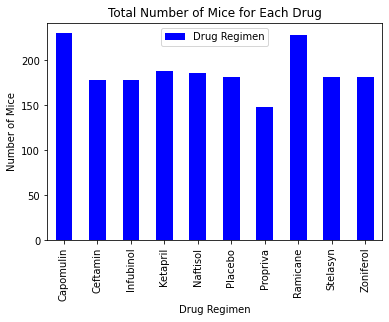

In [107]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_df = pd.DataFrame(regimen_group["Drug Regimen"].count())
count_bar = drug_df.plot(kind = "bar", title = "Total Number of Mice for Each Drug", color="blue")
count_bar.set_ylabel("Number of Mice")
count_bar.set_xlabel("Drug Regimen")

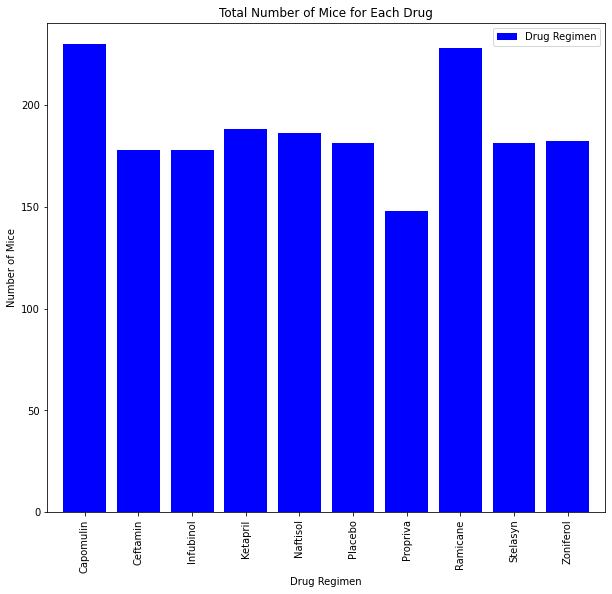

In [108]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(drug_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize = (10,9))
plt.bar(x_axis, drug_df["Drug Regimen"], color="blue", align="center")
plt.xticks(tick_locations,list(drug_df.index), rotation = "vertical")
plt.xlim(-.7, len(x_axis)-.3)
plt.ylim(0, max(drug_df["Drug Regimen"])+10)
plt.title("Total Number of Mice for Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
column_name = ["Drug Regimen"]
plt.legend(column_name, loc ="best")
plt.show()

## Pie Charts

<AxesSubplot:title={'center':' Distribution of Female and Male Mice'}, ylabel='Sex'>

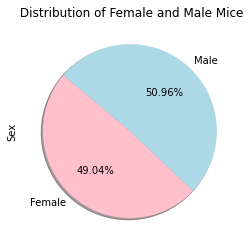

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_merged_df.groupby("Sex")
gender_df = pd.DataFrame(gender_group["Sex"].count())

gender_df.plot(kind="pie", y= "Sex", title = " Distribution of Female and Male Mice", autopct = "%1.2f%%", shadow = True, startangle = 140, colors=["pink","lightblue"], legend=False)


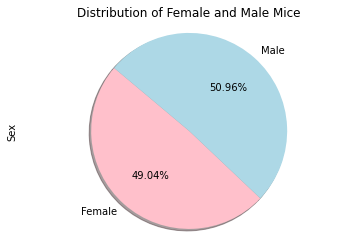

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_df.index.values)
gender_count = gender_df["Sex"]
colors = ["pink", "lightblue"]
plt.pie(gender_count, labels=genders, colors=colors, autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("Distribution of Female and Male Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [151]:
last_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1784,x822,Ceftamin,Male,3,29,45,61.386660,3
1800,y163,Infubinol,Female,17,27,45,67.685569,3
1832,y769,Ceftamin,Female,6,27,45,68.594745,4
1842,y865,Ceftamin,Male,23,26,45,64.729837,3


In [165]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_drugs = clean_merged_df[clean_merged_df["Drug Regimen"].isin(four_drugs_list)]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor=four_drugs[four_drugs['Timepoint']==four_drugs['Timepoint'].max()]
merged_last_df = pd.merge(last_tumor, clean_merged_df, on=["Timepoint", "Mouse ID"], how="inner")
del merged_last_df["Metastatic Sites_x"]
del merged_last_df["Metastatic Sites_y"]
del merged_last_df["Drug Regimen_y"]
del merged_last_df["Sex_y"]
del merged_last_df["Age_months_y"]
del merged_last_df["Weight (g)_y"]
del merged_last_df["Tumor Volume (mm3)_y"]

merged_last_df = merged_last_df.rename(columns={"Drug Regimen_x": "Drug Regimen", "Sex_x": "Sex", "Age_months_x":"Age in Months",
                                               "Weight(g)_x": "Weight (g)", "Tumor Volume (mm3)_x": "Tumor Volume (mm3)"})
merged_last_df

,Mouse ID,Drug Regimen,Sex,Age in Months,Weight (g)_x,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45,22.050126
1,s185,Capomulin,Female,3,17,45,23.343598
2,x401,Capomulin,Female,16,15,45,28.484033
3,m601,Capomulin,Male,22,17,45,28.430964
4,g791,Ramicane,Male,11,16,45,29.128472
...,...,...,...,...,...,...,...
58,x822,Ceftamin,Male,3,29,45,61.386660
59,y163,Infubinol,Female,17,27,45,67.685569
60,y769,Ceftamin,Female,6,27,45,68.594745
61,y865,Ceftamin,Male,23,26,45,64.729837


In [166]:
# Create empty list to fill with tumor vol data (for plotting)
# Put treatments into a list for for loop (and later for plot labels)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
tumor_vol_list = []
for drug in four_drugs_list:
    drugs_vol = merged_last_df.loc[merged_last_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    tumor_vol_list.append(drugs_vol)
    quartiles = drugs_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"-----------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    

-----------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 37.31184577 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
-----------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range of Ramicane is: 7.527130082499998
The the median of Ramicane is: 34.848627300000004 
Values below 19.690480101250003 for Ramicane could be outliers.
Values above 49.79900043124999 for Ramicane could be outliers.
-----------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 62.75445141
The upper quartile of Infubinol is: 67.

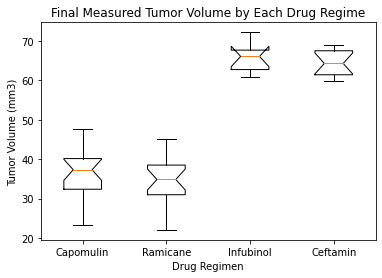

In [169]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots()
ax.boxplot(tumor_vol_list,four_drugs_list, flierprops = dict(markerfacecolor='red',markersize=12))
ax.set_title("Final Measured Tumor Volume by Each Drug Regime")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4], four_drugs_list)
plt.show()

## Line and Scatter Plots

In [114]:
capomulin_data = clean_merged_df.loc[clean_merged_df["Drug Regimen"]=="Capomulin"]
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1439,r157,Capomulin,Male,22,25,0,45.000000,0
1440,r157,Capomulin,Male,22,25,5,45.597064,0
1441,r157,Capomulin,Male,22,25,10,46.059608,0


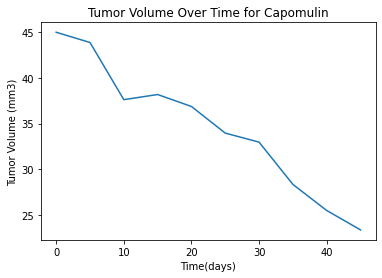

In [158]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mice = capomulin_data.loc[capomulin_data["Mouse ID"]=="s185"]
time_series = cap_mice["Timepoint"]
plt.plot(time_series, cap_mice["Tumor Volume (mm3)"])
plt.title("Tumor Volume Over Time for Capomulin")
plt.xlabel("Time(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [144]:
cap_mouse = capomulin_data.groupby("Mouse ID").mean()
cap_mouse_df = pd.DataFrame(cap_mouse)
cap_mouse_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


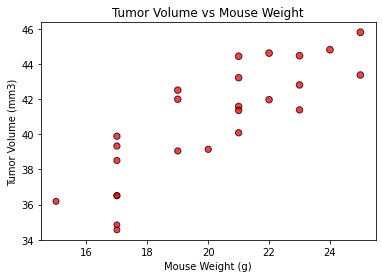

In [145]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(cap_mouse_df["Weight (g)"], cap_mouse_df["Tumor Volume (mm3)"], marker = "o", facecolors="red", edgecolors="black", s=cap_mouse_df["Tumor Volume (mm3)"], alpha=.75)
plt.title("Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [148]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouse_df["Weight (g)"],cap_mouse_df["Tumor Volume (mm3)"])
correlation

(0.8419363424694717, 1.322572243471279e-07)

The r-squared is: 0.8419363424694718
The equation of the regression line is: y= 0.95x + 21.55


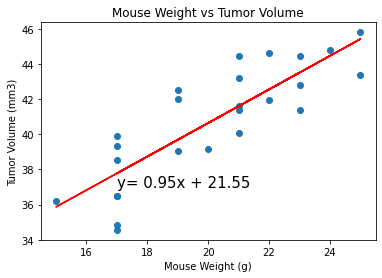

In [150]:
x_values = cap_mouse_df["Weight (g)"]
y_values = cap_mouse_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values_list,y_values_list)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (17,37), fontsize=15, color="black")
plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()